By :- Swaraj Sawarkar

**IMPORT LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')
plt.style.use(['seaborn-bright','dark_background'])

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df.shape

(5110, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [8]:
from sklearn.impute import KNNImputer

In [9]:
imputer = KNNImputer(n_neighbors= 5)
df['bmi']=imputer.fit_transform(df[['bmi']])

In [10]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

**EXPLORATORY DATA ANALYSIS**

In [11]:
n_df = df[['id','age','hypertension','heart_disease',	'avg_glucose_level']]
n_df.head()

,id,age,hypertension,heart_disease,avg_glucose_level
0,9046,67.0,0,1,228.69
1,51676,61.0,0,0,202.21
2,31112,80.0,0,1,105.92
3,60182,49.0,0,0,171.23
4,1665,79.0,1,0,174.12


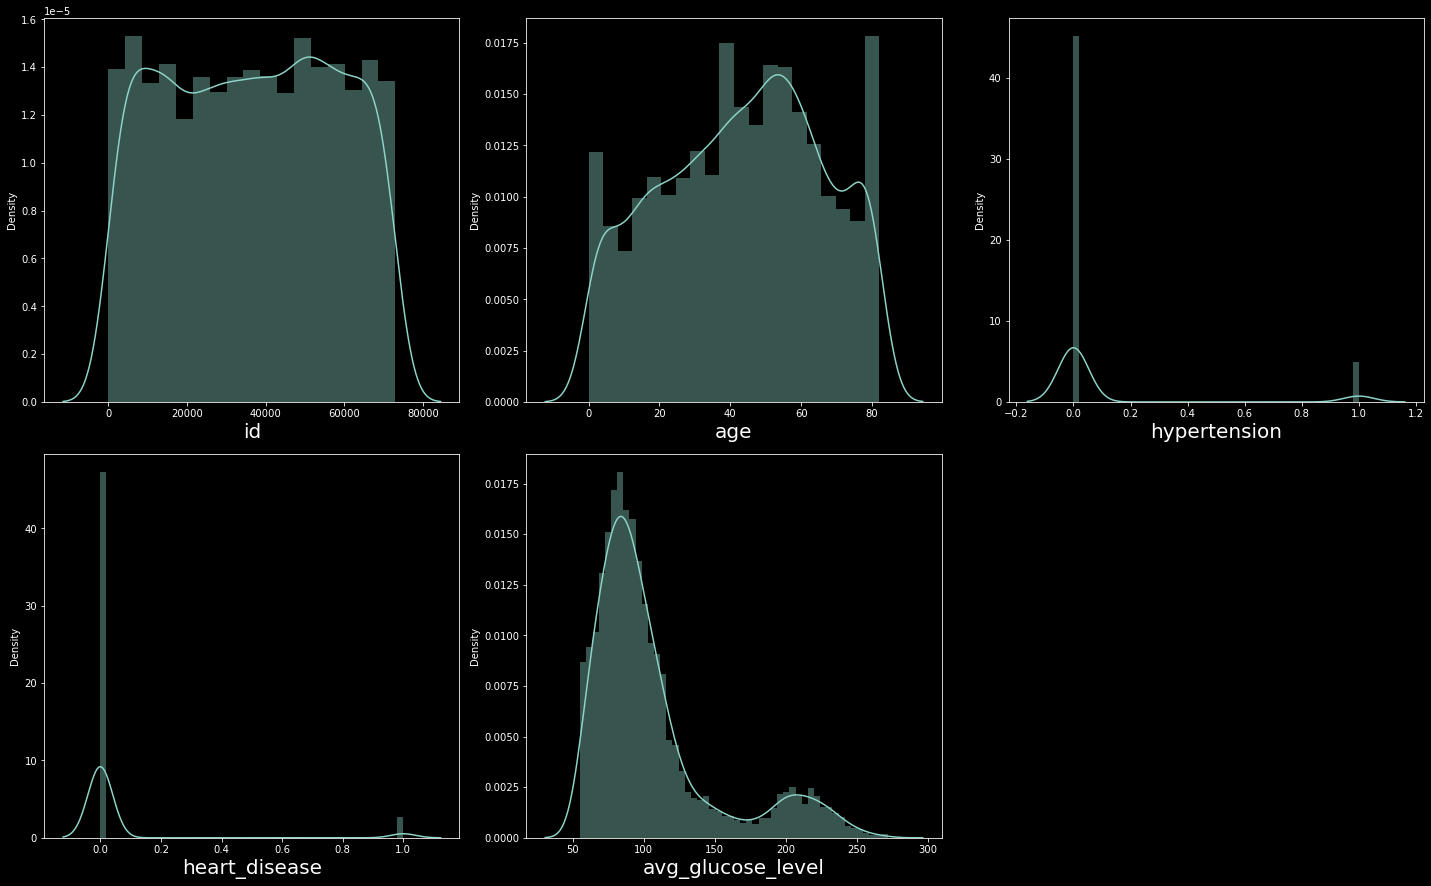

In [12]:
plt.figure(figsize=(20,30))
plotnumber=1

for column in n_df:
  if plotnumber<=15:
    ax = plt.subplot(5,3,plotnumber)
    sns.distplot(n_df[column])
    plt.xlabel(column,fontsize = 20)

  plotnumber+=1
plt.tight_layout()   
plt.show() 


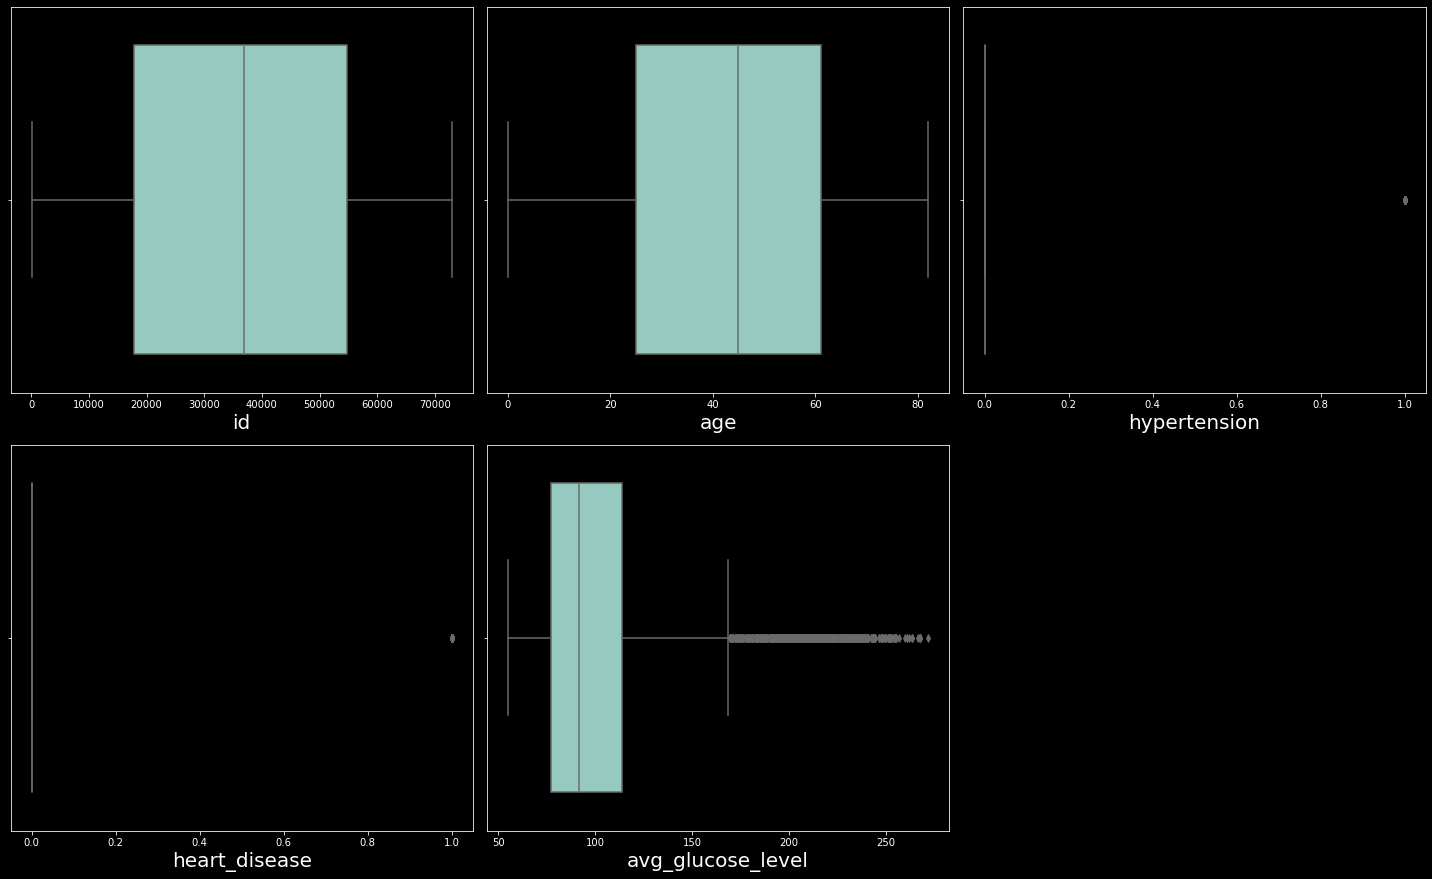

In [13]:
plt.figure(figsize=(20,30))
plotnumber=1

for column in n_df:
  if plotnumber<=15:
    ax = plt.subplot(5,3,plotnumber)
    sns.boxplot(n_df[column])
    plt.xlabel(column,fontsize = 20)

  plotnumber+=1
plt.tight_layout()   
plt.show() 

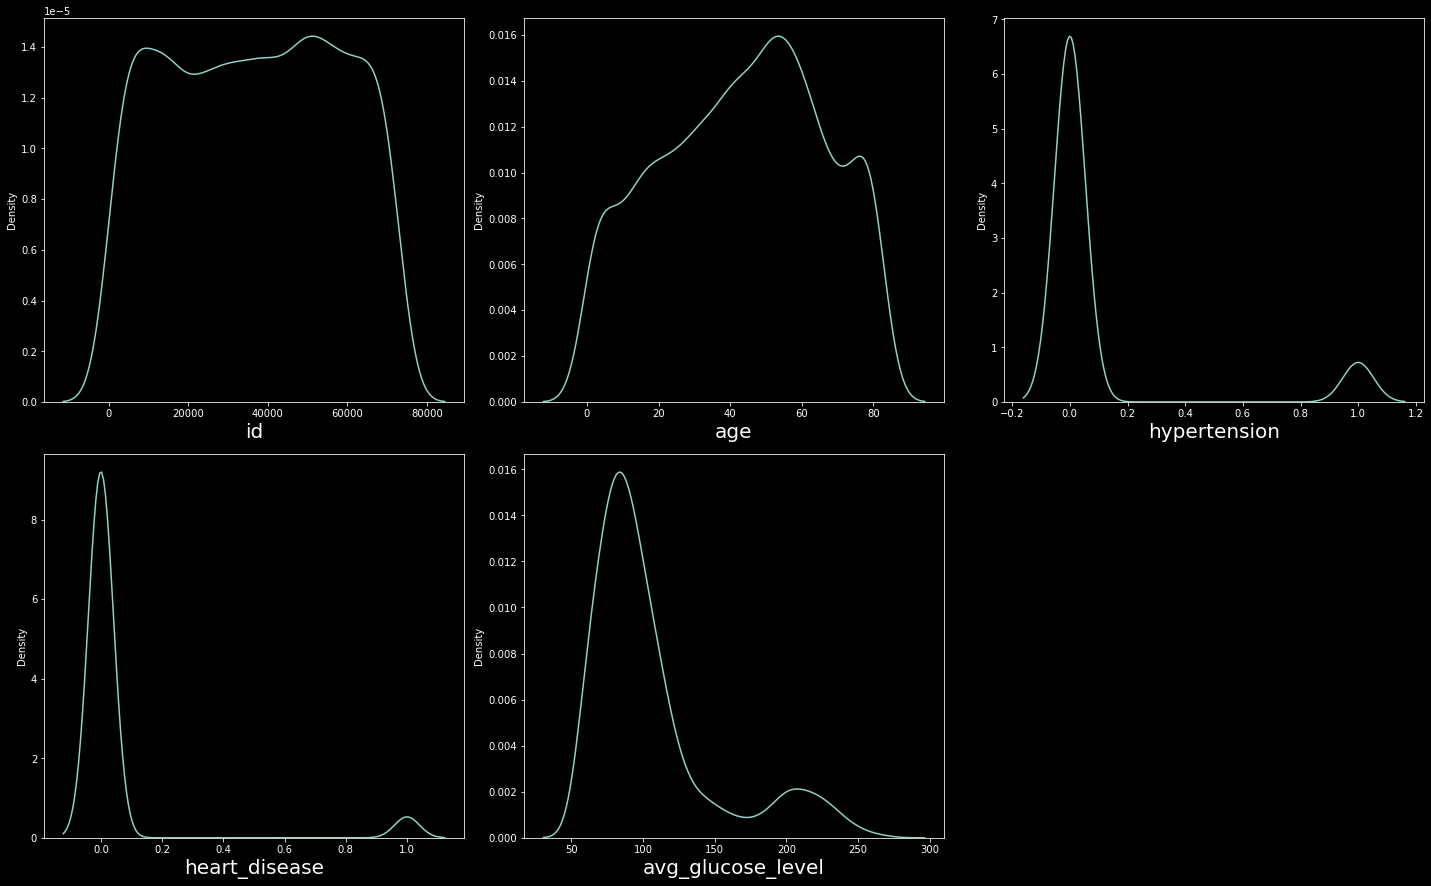

In [14]:
plt.figure(figsize=(20,30))
plotnumber=1

for column in n_df:
  if plotnumber<=15:
    ax = plt.subplot(5,3,plotnumber)
    sns.kdeplot(n_df[column])
    plt.xlabel(column,fontsize = 20)

  plotnumber+=1
plt.tight_layout()   
plt.show() 

In [15]:
# categorical columns

**CATEGORICAL DATA**

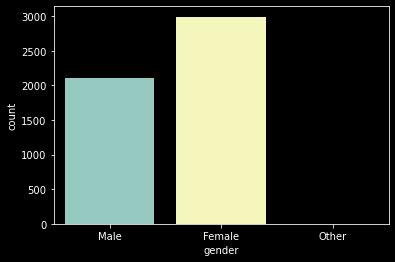

In [16]:
sns.countplot(df['gender'])
plt.show()

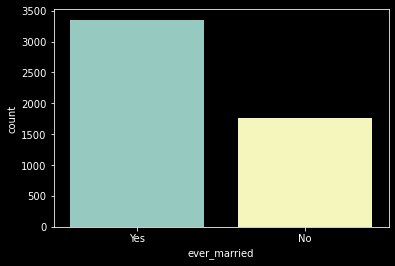

In [17]:
'''id	gender	age	hypertension	heart_disease	ever_married	work_type	Residence_type	avg_glucose_level	bmi	smoking_status	stroke'''
sns.countplot(df['ever_married'])
plt.show()

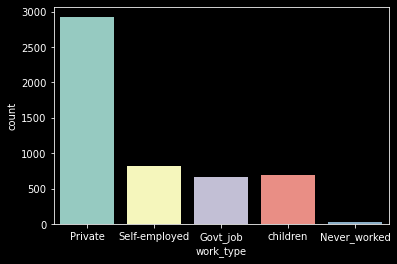

In [18]:
sns.countplot(df['work_type'])
plt.show()


In [19]:
## As the never worked field is very less in number we will drop theses rows.
df = df[df['work_type']!='Never_worked']

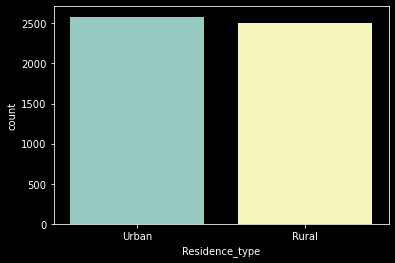

In [20]:
sns.countplot(df['Residence_type'])
plt.show()

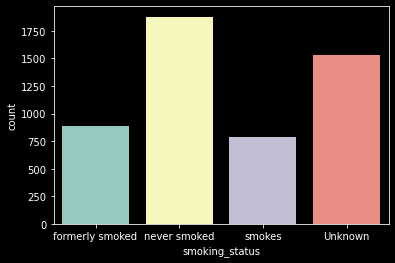

In [21]:
sns.countplot(df['smoking_status'])
plt.show()

**HANDLING CATEGORICAL DATA**

In [22]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [23]:
df['smoking_status'].value_counts()

never smoked       1878
Unknown            1536
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [24]:
df.smoking_status.nunique()

4

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5088 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5088 non-null   int64  
 1   gender             5088 non-null   object 
 2   age                5088 non-null   float64
 3   hypertension       5088 non-null   int64  
 4   heart_disease      5088 non-null   int64  
 5   ever_married       5088 non-null   object 
 6   work_type          5088 non-null   object 
 7   Residence_type     5088 non-null   object 
 8   avg_glucose_level  5088 non-null   float64
 9   bmi                5088 non-null   float64
 10  smoking_status     5088 non-null   object 
 11  stroke             5088 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 645.8+ KB


In [26]:
df['stroke'].value_counts()

0    4839
1     249
Name: stroke, dtype: int64

In [27]:
df.gender.value_counts()

Female    2983
Male      2104
Other        1
Name: gender, dtype: int64

In [28]:
gender = pd.get_dummies(df[['gender']],drop_first=True)
gender.head()

,gender_Male,gender_Other
0,1,0
1,0,0
2,1,0
3,0,0
4,0,0


In [29]:
ever_married = pd.get_dummies(df[['ever_married']],drop_first=True)
ever_married.head()

,ever_married_Yes
0,1
1,1
2,1
3,1
4,1


In [30]:
work_type = pd.get_dummies(df[['work_type']],drop_first=True)
work_type.head()

,work_type_Private,work_type_Self-employed,work_type_children
0,1,0,0
1,0,1,0
2,1,0,0
3,1,0,0
4,0,1,0


In [31]:
Residence_type = pd.get_dummies(df[['Residence_type']],drop_first=True)
Residence_type.head()

,Residence_type_Urban
0,1
1,0
2,0
3,1
4,0


In [32]:
smoking_status = pd.get_dummies(df[['smoking_status']],drop_first=True)
smoking_status.head()

,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,0,0
1,0,1,0
2,0,1,0
3,0,0,1
4,0,1,0


In [33]:
data=pd.concat([df,gender,ever_married,work_type,Residence_type,smoking_status],axis=1)
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,...,gender_Male,gender_Other,ever_married_Yes,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,...,1,0,1,1,0,0,1,1,0,0
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,...,0,0,1,0,1,0,0,0,1,0
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,...,1,0,1,1,0,0,0,0,1,0
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,...,0,0,1,1,0,0,1,0,0,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,...,0,0,1,0,1,0,0,0,1,0


In [34]:
data = data.drop(columns=['gender','ever_married','work_type','Residence_type','smoking_status'],axis=1)
data.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.600000,1,1,0,1,1,0,0,1,1,0,0
1,51676,61.0,0,0,202.21,28.893237,1,0,0,1,0,1,0,0,0,1,0
2,31112,80.0,0,1,105.92,32.500000,1,1,0,1,1,0,0,0,0,1,0
3,60182,49.0,0,0,171.23,34.400000,1,0,0,1,1,0,0,1,0,0,1
4,1665,79.0,1,0,174.12,24.000000,1,0,0,1,0,1,0,0,0,1,0


In [35]:
data = data.drop(columns=['id'])
data.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.600000,1,1,0,1,1,0,0,1,1,0,0
1,61.0,0,0,202.21,28.893237,1,0,0,1,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.500000,1,1,0,1,1,0,0,0,0,1,0
3,49.0,0,0,171.23,34.400000,1,0,0,1,1,0,0,1,0,0,1
4,79.0,1,0,174.12,24.000000,1,0,0,1,0,1,0,0,0,1,0


In [36]:
correlation = data.corr()
correlation

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
age,1.000000,0.275622,0.263414,0.238000,0.325450,0.244878,-0.026793,-0.010765,0.676882,0.111218,0.326884,-0.638459,0.015988,0.235370,0.122767,0.071173
hypertension,0.275622,1.000000,0.108005,0.174360,0.159981,0.127626,0.021578,-0.004618,0.162992,-0.007079,0.114896,-0.130140,-0.007437,0.058243,0.066046,0.030652
heart_disease,0.263414,0.108005,1.000000,0.161798,0.038544,0.134712,0.086106,-0.003358,0.113701,-0.001172,0.086355,-0.092083,0.003459,0.066370,-0.021349,0.043630
avg_glucose_level,0.238000,0.174360,0.161798,1.000000,0.168946,0.131865,0.054335,0.011486,0.154517,0.015531,0.062357,-0.102761,-0.004431,0.067763,0.024278,0.017256
bmi,0.325450,0.159981,0.038544,0.168946,1.000000,0.038615,-0.024961,-0.011856,0.335272,0.202767,0.070193,-0.444770,0.000775,0.103685,0.106324,0.085007
stroke,0.244878,0.127626,0.134712,0.131865,0.038615,1.000000,0.009311,-0.003180,0.107444,0.010788,0.061773,-0.084293,0.015834,0.064144,-0.003600,0.008525
gender_Male,-0.026793,0.021578,0.086106,0.054335,-0.024961,0.009311,1.000000,-0.011773,-0.029078,-0.031930,-0.025710,0.089816,-0.005029,0.043202,-0.098082,0.011832
gender_Other,-0.010765,-0.004618,-0.003358,0.011486,-0.011856,-0.003180,-0.011773,1.000000,-0.019491,0.012057,-0.006141,-0.005540,-0.014226,0.030555,-0.010724,-0.006007
ever_married_Yes,0.676882,0.162992,0.113701,0.154517,0.335272,0.107444,-0.029078,-0.019491,1.000000,0.147958,0.190974,-0.549250,0.008390,0.169299,0.106877,0.103141
work_type_Private,0.111218,-0.007079,-0.001172,0.015531,0.202767,0.010788,-0.031930,0.012057,0.147958,1.000000,-0.509347,-0.459449,-0.016517,0.023315,0.108232,0.098211


**HEATMAP**

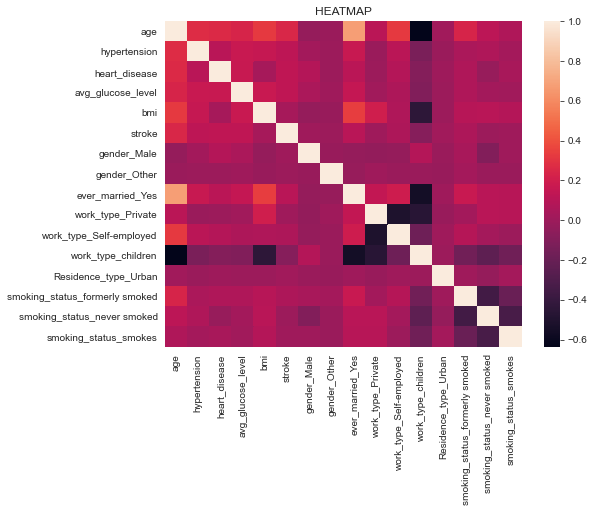

In [37]:
sns.set({'figure.figsize':(8,6)})
sns.heatmap(data=correlation)
plt.title('HEATMAP')
plt.show()

**SPLIT DATASET INTO TRAIN AND TEST**

In [38]:
X = data.drop(columns=['stroke'],axis =1)
print(X)

       age  hypertension  heart_disease  avg_glucose_level        bmi  \
0     67.0             0              1             228.69  36.600000   
1     61.0             0              0             202.21  28.893237   
2     80.0             0              1             105.92  32.500000   
3     49.0             0              0             171.23  34.400000   
4     79.0             1              0             174.12  24.000000   
...    ...           ...            ...                ...        ...   
5105  80.0             1              0              83.75  28.893237   
5106  81.0             0              0             125.20  40.000000   
5107  35.0             0              0              82.99  30.600000   
5108  51.0             0              0             166.29  25.600000   
5109  44.0             0              0              85.28  26.200000   

      gender_Male  gender_Other  ever_married_Yes  work_type_Private  \
0               1             0                 1  

In [39]:
y = data[['stroke']]
print(y)

      stroke
0          1
1          1
2          1
3          1
4          1
...      ...
5105       0
5106       0
5107       0
5108       0
5109       0

[5088 rows x 1 columns]


In [40]:
df = X.copy()

In [41]:
from sklearn.preprocessing import StandardScaler
import pickle
Sc = StandardScaler()
column = X.columns
Sc.fit(X)
X = Sc.transform(X)
pickle_out = open("scaler2.pkl","wb")
pickle.dump(Sc,pickle_out)



X = pd.DataFrame(X,columns=column)

In [42]:
X

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,gender_Other,ever_married_Yes,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1.047275,-0.329388,4.175498,2.702103,0.999531,1.190903,-0.014021,0.719338,0.859934,-0.438005,-0.395096,0.985560,2.179255,-0.764883,-0.428405
1,0.781654,-0.329388,-0.239492,2.118001,-0.001881,-0.839699,-0.014021,0.719338,-1.162879,2.283080,-0.395096,-1.014651,-0.458872,1.307389,-0.428405
2,1.622788,-0.329388,4.175498,-0.005986,0.466780,1.190903,-0.014021,0.719338,0.859934,-0.438005,-0.395096,-1.014651,-0.458872,1.307389,-0.428405
3,0.250412,-0.329388,-0.239492,1.434637,0.713664,-0.839699,-0.014021,0.719338,0.859934,-0.438005,-0.395096,0.985560,-0.458872,-0.764883,2.334238
4,1.578517,3.035929,-0.239492,1.498385,-0.637705,-0.839699,-0.014021,0.719338,-1.162879,2.283080,-0.395096,-1.014651,-0.458872,1.307389,-0.428405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5083,1.622788,3.035929,-0.239492,-0.495017,-0.001881,-0.839699,-0.014021,0.719338,0.859934,-0.438005,-0.395096,0.985560,-0.458872,1.307389,-0.428405
5084,1.667058,-0.329388,-0.239492,0.419297,1.441325,-0.839699,-0.014021,0.719338,-1.162879,2.283080,-0.395096,0.985560,-0.458872,1.307389,-0.428405
5085,-0.369371,-0.329388,-0.239492,-0.511781,0.219895,-0.839699,-0.014021,0.719338,-1.162879,2.283080,-0.395096,-1.014651,-0.458872,1.307389,-0.428405
5086,0.338952,-0.329388,-0.239492,1.325669,-0.429802,1.190903,-0.014021,0.719338,0.859934,-0.438005,-0.395096,-1.014651,2.179255,-0.764883,-0.428405


Balancing the dataset

In [43]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

X_sample, y_sample = smote.fit_resample(X, y)

print('Original dataset \n',y.value_counts()) 
print('Resample dataset \n', y_sample.value_counts())

Original dataset 
 stroke
0         4839
1          249
dtype: int64
Resample dataset 
 stroke
0         4839
1         4839
dtype: int64


In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_sample,y_sample,test_size=0.15,random_state=1)

In [45]:
x_train

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,gender_Other,ever_married_Yes,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
7584,1.449601,-0.329388,4.175498,2.558339,-0.180250,-0.839699,-0.014021,0.719338,0.859934,-0.438005,-0.395096,0.338371,-0.458872,1.307389,-0.428405
1633,-0.103750,-0.329388,-0.239492,-0.072822,1.077495,-0.839699,-0.014021,0.719338,-1.162879,2.283080,-0.395096,-1.014651,2.179255,-0.764883,-0.428405
2680,-0.236560,-0.329388,-0.239492,-0.135468,-1.053511,-0.839699,-0.014021,0.719338,0.859934,-0.438005,-0.395096,-1.014651,-0.458872,-0.764883,2.334238
1169,-1.431855,-0.329388,-0.239492,0.365254,-1.898117,-0.839699,-0.014021,-1.390167,-1.162879,-0.438005,2.531030,-1.014651,-0.458872,-0.764883,-0.428405
6869,1.647837,3.035929,-0.239492,-0.621211,-0.320165,-0.839699,-0.014021,0.719338,0.859934,-0.438005,-0.395096,-1.014651,-0.458872,1.307389,-0.428405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,0.737384,-0.329388,-0.239492,-0.815964,0.258877,1.190903,-0.014021,0.719338,0.859934,-0.438005,-0.395096,-1.014651,-0.458872,1.307389,-0.428405
7813,1.100526,3.035929,-0.239492,-0.774975,-0.158458,-0.839699,-0.014021,0.719338,-0.177606,-0.438005,-0.395096,-1.014651,-0.458872,1.307389,-0.428405
905,-0.502181,-0.329388,-0.239492,-0.640381,0.817616,-0.839699,-0.014021,-1.390167,0.859934,-0.438005,-0.395096,-1.014651,-0.458872,-0.764883,2.334238
5192,1.516235,3.035929,-0.239492,-0.692024,-0.836412,-0.839699,-0.014021,0.719338,0.859934,-0.438005,-0.395096,-1.014651,0.334829,0.683930,-0.428405


**MODEL TRAINING**

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble  import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


In [47]:
models = []
models.append(("LogisticRegression",LogisticRegression()))
models.append(("DecisionTree",DecisionTreeClassifier()))
models.append(("RandomForest",RandomForestClassifier()))
models.append(("SupportVector",SVC()))
models.append(("KNeighbors",KNeighborsClassifier()))


In [48]:
for name,model in models:
    model.fit(x_train,y_train)
    train_score = model.score(x_train,y_train)
    test_score = model.score(x_test,y_test)
    print(name,"train score =",train_score)
    print(name,"test score =",test_score)

LogisticRegression train score = 0.7900559202528568
LogisticRegression test score = 0.7947658402203857
DecisionTree train score = 1.0
DecisionTree test score = 0.8939393939393939
RandomForest train score = 1.0
RandomForest test score = 0.9586776859504132
SupportVector train score = 0.8803792851932896
SupportVector test score = 0.871900826446281
KNeighbors train score = 0.9336250911743253
KNeighbors test score = 0.9070247933884298


In [49]:
## Lets try auc-roc

In [50]:
model1 = LogisticRegression()
model2 = DecisionTreeClassifier()
model3 = RandomForestClassifier()
model4 = KNeighborsClassifier()

In [51]:
model1.fit(x_train,y_train)
model2.fit(x_train,y_train)
model3.fit(x_train,y_train)
model4.fit(x_train,y_train)


pred_prob1 = model1.predict_proba(x_test)
pred_prob2 = model2.predict_proba(x_test)
pred_prob3 = model3.predict_proba(x_test)
pred_prob4 = model4.predict_proba(x_test)

In [52]:
from sklearn.metrics import roc_curve

fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob4[:,1], pos_label=1)

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [53]:
from sklearn.metrics import roc_auc_score
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])
auc_score3 = roc_auc_score(y_test, pred_prob3[:,1])
auc_score4 = roc_auc_score(y_test, pred_prob4[:,1])


print(auc_score1,",", auc_score2,"," ,auc_score3,",",auc_score4)
"""0.7955840455840456 , 0.5598290598290598 , 0.7695868945868946 , 0.6559829059829061"""

0.8495729773134113 , 0.8917380269444767 , 0.9927760176314145 , 0.962330125838337


'0.7955840455840456 , 0.5598290598290598 , 0.7695868945868946 , 0.6559829059829061'

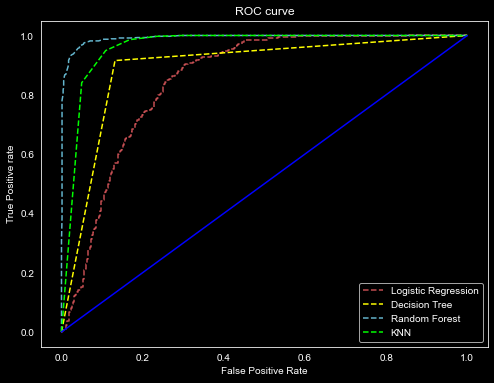

In [54]:
plt.style.use(['seaborn-bright','dark_background'])
plt.plot(fpr1, tpr1, linestyle='--',color='r', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='yellow', label='Decision Tree')
plt.plot(fpr3, tpr3, linestyle='--',color='c', label='Random Forest')
plt.plot(fpr4, tpr4, linestyle='--',color='lime', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='-', color='blue')
plt.grid(b=None)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show();

In [55]:
## Random Forest seems to be best

In [56]:
model = RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

### Saving model

In [57]:
import pickle

In [58]:
pickle_out = open("stroke.pkl","wb")
pickle.dump(model,pickle_out)

In [59]:
loaded_model = pickle.load(open("stroke.pkl","rb"))
result = loaded_model.score(x_test,y_test)
print(result)

0.953168044077135
